# ECON416 Final Project (@ SUNY Binghamton)
**Food price inflation and crime in food secure vs. food insecure states**

written by: Ricky Zou (class of 2023)

## Introduction
Humans have an inherent and instinctive desire to satisfy specific needs in order to survive and properly function. Following Maslow’s hierarchy of needs, the ability to access food is one of those fundamental needs that is essential for the well-being of the individual. In our modern society, the food we put in our bodies is, for the most part, accessed and purchased from third party vendors such as grocery stores, deli markets, farmer’s markets, and restaurants. The system in which people can feed themselves in developed countries is directly associated with their financial situation rather than the ability to cultivate and harvest their own food. Another aspect of living that is directly related to an individual’s finances is where they live. Likewise, where an individual resides also directly affects the way they can feed themselves. These intertwining dynamics of location, finances, and the ability to feed oneself bring life to the concept of “food security and insecurity”. The United States Department of Agriculture (USDA) defines food insecurity as the lack of consistent access to enough food for every person in a household to live an active, healthy life (paraphrased from the USDA website). This definition entails access to both edible food in general, and the nutritional content and safety of such edible products.

As a young male born and raised into a middle-middle class household, I don’t remember ever having to worry about intaking sufficient food and the quality of the food I put in my body. As I’ve gotten older and have seen what reality is like for millions of Americans living through poverty, I’ve really been able to understand my relative privileges and am fortunate enough to be able to comfortably sit here and commentate on these real issues rather than enduring them myself. As someone who wants to be a part of and contribute to a safe society striving toward improving the living standards for the masses, examining food prices and its implications on crime peaks my interest as I believe meaningful findings in the correlations and causations of quality access to food and every other aspect of society, such as criminal activity, is vital to policymakers and those in power when they make critical decisions that impact millions.

It is common sense that higher food prices lead to more stress for those who are struggling financially, which will lead to an uptick in criminal activity. However, as with everything, there exists nuance with how any two things are correlated. In this project, I try to answer questions such as: 
- When food prices rise, which types of food/food baskets correlate the most with criminal activity?
- Is there a difference in how rising food prices affect areas with high levels of food insecurity vs. lower levels of food insecurity?
- And, how well can we predict criminal activity movement solely using food price inflation data?

In order to tackle these questions, I narrowed my focus down to four states, two with relatively high levels of food insecurity and two with relatively low levels of food insecurity. I gathered criminal activity data from these four states along with consumer price index (CPI) data of food prices of various food baskets in the United States. I found the correlation statistics between food price inflation of the various food baskets and whether criminal activity increased or decreased in each state. Additionally, I chose to utilize the Random Forest Classification model in order to examine how well we can predict the movement of criminal activity using food price inflation as input variables. While the results I got are sufficient enough for interpretation, in the end, there clearly exist many limitations to my analysis and the data I chose to use. 


## Literature Review
I found a research paper written by Emily Blankenberger associated with Illinois State University titled [Feeding Peace: An Investigation of the Relationship between Food Insecurity and Violence.](https://ir.library.illinoisstate.edu/cgi/viewcontent.cgi?article=1019&context=scced) Similar to my analysis, Emily explicitly states that “overall, it was found there was no statistically significant relationship between food insecurity and violence" (Blankenberger 2016), however, there is still enough work to interpret and build upon. Using an Ordinary least squares (OLS) regression model, Emily attempts to find any statistical significance between food insecurity and violence using a bevy of different input variables correlated to these matters. She used data from 160 different countries and ran into issues surrounding holding other variables constant in her analysis. It was found, however, that there exists a positive relationship between aid variables, types of financial and geopolitical aid a country receives from other countries, and food insecurity variables. In the end, Emily finds that there is no statistical significance between food deficiency and violence, leading her to believe that there are other variables that play a much bigger role in the movement of violence.

My analysis is different because I am focusing on just the United States rather than numerous different countries, and I am examining different food baskets along with two types of crime: violent AND property crime.  


## Approach/Formatting, and Hypotheses
#### Approach/Formatting
- I initially took food expenditure data and robbery data from **OurWorldInData** to visualize any potential relationships between how much money is spent on food and robbery offenses. This is meant to set the stage of the topic for the specific analysis I went into.
- I then utilized food insecurity data I found from [SocialPolicyLab.org](https://www.socialpolicylab.org/post/grow-your-blog-community), a data visualization research lab intended to produce work that assists policymakers, academics, and journalists in their lines of work. From the gathered data, I was able to pinpoint 2 states with relatively high levels of food insecurity and 2 states with relatively low levels of food insecurity.
- I then used food CPI data from the FRED to calculate food price inflation. I performed analysis on data dating from 1989 - 2020, as these were the years in which the crime data and food data intersect. 
- I found data on violent and property criminal offenses per 100,000 for the four states I chose to look into and aggregated accordingly. My target variable in my Random Forest Classification trials were whether or not crime increased or decreased for each type of crime in each state. I also used this information to calculate correlation statistics between the different food baskets and crime movement in each state.

A closer look at the results and analysis is embedded along with the code below

**Note:** I've commented out parts of the code that return the 'head' of a dataframe to reduce clutter. The lines of code using the 'head' method that are NOT commented out are meant to be, as they are beneficial to the reader.

#### Hypotheses
- Meat and protein related food products correlate the most with the movement of crime.
- We can better predict the movement of property crime using food price inflation compared to predicting movement in violent crime because I believe food insecurity leads to a higher inclination to steal from others rather than immediately instantiating violence.
- Stronger correlations will exist between food price inflation and crime in the states with higher levels of food insecurity compared to the states with lower levels of food insecurity.

---

## Loading in Necessary Packages & Formatting Output

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.precision', 2)

---

## Initial Exploratory Analysis of Food Expenditure and Crime in the US

In [3]:
food_exp = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/food-expenditure-per-person.csv')
food_exp['Total food expenditure'] = food_exp['Food expenditure away from home (constant 1988 prices)'] + food_exp['Food expenditure at home (constant 1988 prices)']
    
food_exp.drop(food_exp.columns[[0,1]], axis=1, inplace=True)
food_exp.set_index('Year', inplace=True)
food_exp = food_exp.loc[1985:]

robbery = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/robbery_1985_2014.csv') 
robbery = robbery.T
robbery = robbery.rename(columns={0:'Rate of Robbery Offenses per 100,000'})
robbery = robbery[1:]
robbery.index.name = 'Year'

In [4]:
food_and_crime = pd.concat([food_exp.reset_index(), robbery.reset_index()], axis=1)
food_and_crime.drop(food_and_crime.columns[[4]], axis=1, inplace=True)

food_and_crime['Year'] = list(range(1985, 2015))
food_and_crime.set_index('Year', inplace=True)

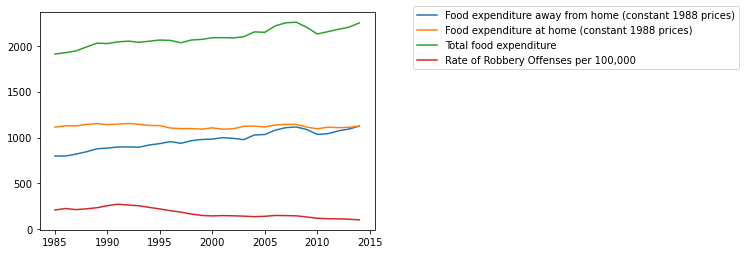

In [5]:
fig, ax = plt.subplots()
ax.plot(food_and_crime, label=food_and_crime.columns)
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

The correlation between Total food expenditure and Rate of robbery offenses per 100,000 people is not super clear, so let's dig into some more specific data and examine any possible relationships between food prices and crime.

---

## Working with US Food Insecurity Data from 2018
Here, we are trying to locate the states with the highest and lowest levels of food insecurity so we can focus on crime data from those states to took a closer look at the potential implications of food price inflation and crime.

In [6]:
food_ins = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/Food_desert_2018.csv')
food_ins.sort_values(by='Food Insecurity Rate', ascending=False, inplace=True)

In [7]:
food_ins.head(10)

,FIPS,"County, State",Food Insecurity Rate,2018 Food Insecurity Rate,# of Food Insecure Persons in 2018,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI &gt; High Threshold,2018 Child food insecurity rate,# of Food Insecure Children in 2018,% food insecure children in HH w/ HH incomes below 185 FPL in 2018,% food insecure children in HH w/ HH incomes above 185 FPL in 2018,2018 Cost Per Meal,2018 Weighted Annual Food Budget Shortfall
1432,28063,"Jefferson County, Mississippi",30.40,0.30,2230,130%,SNAP,185%,Other Nutrition Program,88.30%,11.70%,0.00%,40.00%,680,63%,37%,$3.02,1141000
1428,28055,"Issaquena County, Mississippi",28.90,0.29,380,130%,SNAP,185%,Other Nutrition Program,70.60%,29.40%,0.00%,41.10%,80,90%,10%,$3.11,200000
1130,22035,"East Carroll Parish, Louisiana",28.20,0.28,2040,130%,SNAP,185%,Other Nutrition Program,59.60%,40.40%,0.00%,43.70%,600,68%,33%,$3.06,1056000
81,2158,"Kusilvak Census Area, Alaska",28.00,0.28,2290,130%,SNAP,185%,Other Nutrition Program,99.60%,0.40%,0.00%,43.20%,"1,440",100%,0%,$4.35,1688000
1426,28051,"Holmes County, Mississippi",27.80,0.28,5030,130%,SNAP,185%,Other Nutrition Program,90.20%,9.80%,0.00%,34.40%,"1,630",62%,38%,$3.25,2769000
1411,28021,"Claiborne County, Mississippi",27.10,0.27,2470,130%,SNAP,185%,Other Nutrition Program,86.10%,13.90%,0.00%,37.00%,740,53%,47%,$3.15,1318000
52,1105,"Perry County, Alabama",27.00,0.27,2560,130%,SNAP,185%,Other Nutrition Program,86.70%,1.00%,12.30%,37.70%,780,67%,33%,$3.07,1331000
2412,46102,"Oglala Lakota County, South Dakota",26.90,0.27,3860,130%,SNAP,185%,Other Nutrition Program,83.10%,3.00%,14.00%,38.10%,"2,030",99%,1%,$3.14,2049000
1427,28053,"Humphreys County, Mississippi",26.40,0.26,2250,130%,SNAP,185%,Other Nutrition Program,88.90%,11.10%,0.00%,35.10%,800,61%,39%,$3.03,1155000
31,1063,"Greene County, Alabama",26.10,0.26,2200,130%,SNAP,185%,Other Nutrition Program,91.50%,8.50%,0.00%,38.60%,720,70%,30%,$3.34,1243000


In [8]:
food_ins.tail(10)

,FIPS,"County, State",Food Insecurity Rate,2018 Food Insecurity Rate,# of Food Insecure Persons in 2018,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI &gt; High Threshold,2018 Child food insecurity rate,# of Food Insecure Children in 2018,% food insecure children in HH w/ HH incomes below 185 FPL in 2018,% food insecure children in HH w/ HH incomes above 185 FPL in 2018,2018 Cost Per Meal,2018 Weighted Annual Food Budget Shortfall
2005,38031,"Foster County, North Dakota",4.60,0.05,150,200%,"SNAP, Other Nutrition Programs",200%,"SNAP, Other Nutrition Programs",81.90%,NaN,18.10%,9.10%,70,92%,8%,$3.23,82000
2925,51610,"Falls Church city, Virginia",4.50,0.05,630,130%,SNAP,185%,Other Nutrition Program,18.90%,8.10%,73.10%,2.40%,90,39%,61%,$3.92,418000
1995,38011,"Bowman County, North Dakota",4.40,0.04,140,200%,"SNAP, Other Nutrition Programs",200%,"SNAP, Other Nutrition Programs",55.50%,NaN,44.50%,6.20%,50,29%,71%,$3.40,81000
2035,38091,"Steele County, North Dakota",4.30,0.04,80,200%,"SNAP, Other Nutrition Programs",200%,"SNAP, Other Nutrition Programs",61.00%,NaN,39.00%,9.70%,40,37%,64%,$3.26,44000
2027,38075,"Renville County, North Dakota",4.30,0.04,110,200%,"SNAP, Other Nutrition Programs",200%,"SNAP, Other Nutrition Programs",80.30%,NaN,19.70%,7.80%,50,73%,27%,$3.28,61000
1323,27019,"Carver County, Minnesota",4.30,0.04,4330,165%,SNAP,185%,Other Nutrition Program,40.10%,4.90%,55.00%,7.00%,"1,910",45%,56%,$3.83,2804000
2000,38021,"Dickey County, North Dakota",4.10,0.04,200,200%,"SNAP, Other Nutrition Programs",200%,"SNAP, Other Nutrition Programs",82.60%,NaN,17.40%,6.20%,70,61%,39%,$3.13,106000
2030,38081,"Sargent County, North Dakota",4.10,0.04,160,200%,"SNAP, Other Nutrition Programs",200%,"SNAP, Other Nutrition Programs",68.60%,NaN,31.40%,7.20%,50,51%,49%,$3.27,88000
2872,51107,"Loudoun County, Virginia",3.80,0.04,14700,130%,SNAP,185%,Other Nutrition Program,33.40%,18.70%,48.00%,3.90%,"4,380",71%,29%,$3.72,9249000
1996,38013,"Burke County, North Dakota",3.60,0.04,80,200%,"SNAP, Other Nutrition Programs",200%,"SNAP, Other Nutrition Programs",94.80%,NaN,5.20%,7.50%,50,83%,17%,$3.45,47000


We can see from the first 10 rows in our sorted data frame that the majority of counties with the highest food insecurity rates are located in Mississippi and Alabama. Similarly, we can see that the majority of counties with the lowest food insecurity rates are located in North Dakota and Virginia. 

From this information, I will be taking a look at crime statistics in these 4 states to see if there is a notable difference in how changes in food prices affect crime in the hungriest and not-so-hungry states.

---

## Processing Food CPI Data

In [9]:
food_cpi = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/fred_food_cpi.csv',
                       index_col=0, parse_dates=True)

In [10]:
# list(food_cpi.columns)

In [11]:
# Renaming columns with appropriate name

food_cpi_columns = {'CUSR0000SAF112':'Meats_Poultry_Fish_Eggs',
 'CUUR0000SEFJ':'Dairy_and_Related_Prod',
 'CUSR0000SAF113':'Fruits_and_Vegetables',
 'CUSR0000SAF111':'Cereals_and_Bakery_Prod',
 'CUUR0000SAF114':'Nonalc_Bev_and_Bev_Materials'}

food_cpi.rename(columns=food_cpi_columns, inplace=True)

In [51]:
# food_cpi.head(3)

Although we have data for the `Dairy_and_Related_Prod` column dating back to 1935, data collection for all 5 food categories starts in 1989. Additionally, our crime data dates from 1985 through 2020, so we'll take relevant data from 1989-2020 for food CPI and crime.

In [13]:
food_cpi = food_cpi.loc['1989-01-01':'2020-12-01']

In [14]:
food_cpi.head(13)

,Meats_Poultry_Fish_Eggs,Dairy_and_Related_Prod,Fruits_and_Vegetables,Cereals_and_Bakery_Prod,Nonalc_Bev_and_Bev_Materials
DATE,,,,,
1989-01-01,117.900,112.60,131.900,127.800,109.600
1989-02-01,118.400,113.40,134.500,128.800,111.300
1989-03-01,120.400,113.80,134.300,129.900,111.300
1989-04-01,120.900,114.10,135.200,130.200,111.800
1989-05-01,121.600,113.80,139.200,131.500,111.500
1989-06-01,122.100,113.60,139.200,131.900,111.600
1989-07-01,121.700,114.10,140.000,133.100,112.300
1989-08-01,121.900,114.50,141.100,133.700,111.200
1989-09-01,122.500,116.10,139.500,134.500,111.000


The way inflation is calculated based on this CPI data is as follows:
- The data in each row according to each date in the 'DATE' index column represents the CPI values relative to one previous calendar year.
- So if we wanted to know the inflation/deflation rate for Fruits and Vegetables from 01/01/1989 to 01/01/1990, we would calculate it as follows: `(149.0 - 131.9) / 131.9` x `100` = `12.96%`
- Because our crime data is organized from the beginning to the end of each calendar year (January to January), we will calculate and focus on the inflation/deflation rates for each year from January to January for each food basket.

In [15]:
# Resetting the index so we have 'DATE' as a column so we can easily filter out data based on the month we want (Jan.)

food_cpi.reset_index(inplace=True)

# Filtering out data for each 'January' from 1989 - 2020

food_cpi = food_cpi[food_cpi['DATE'].dt.month == 1]

# Resetting the 'DATE' column as our index

food_cpi.set_index('DATE', inplace=True)

In [16]:
# food_cpi.head(3)

In [17]:
food_cpi['Meats_Poultry_Fish_Eggs'].dtypes # We can see that the data type of the values in the columns are 'objects'

dtype('O')

In [18]:
# We need to change the data type to a numeric datatype so we can perform calculations

food_cpi = food_cpi.apply(pd.to_numeric)

food_cpi['Meats_Poultry_Fish_Eggs'].dtypes

dtype('float64')

In [19]:
# Getting the percentage change (inflation/deflation) from last year (1 year periods)

ann_food_pct_change = (food_cpi - food_cpi.shift()) / food_cpi.shift() * 100

# Dropping the first row of 'NaN' values

ann_food_pct_change = ann_food_pct_change[1:]

In [20]:
# ann_food_pct_change.head(3)

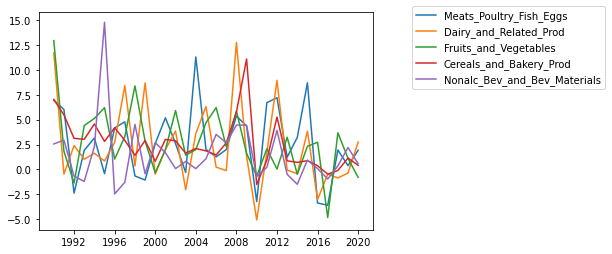

In [21]:
fig, ax = plt.subplots()
ax.plot(ann_food_pct_change, label=ann_food_pct_change.columns)
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

We see that inflation for food prices across these different food baskets have been quite volatile, which is not uncommon when examining inflation numbers.

In [22]:
def infl_or_defl(rate):
    '''
    This function is meant to take each column of our dataframe and return 'inflation'
    if the value is positive, and 'deflation' if the value is negative
    '''
    if rate < 0:
        out = 'Deflation'
    else:
        out = 'Inflation'
        
    return out

In [23]:
# Creating a dataframe indicating whether prices inflated or deflated from the previous year for each food basket

food_infl_or_defl = ann_food_pct_change.applymap(infl_or_defl)

In [24]:
food_infl_or_defl.head(3)

,Meats_Poultry_Fish_Eggs,Dairy_and_Related_Prod,Fruits_and_Vegetables,Cereals_and_Bakery_Prod,Nonalc_Bev_and_Bev_Materials
DATE,,,,,
1990-01-01,Inflation,Inflation,Inflation,Inflation,Inflation
1991-01-01,Inflation,Deflation,Inflation,Inflation,Inflation
1992-01-01,Deflation,Inflation,Deflation,Inflation,Deflation


We can see that food prices don't always experience inflation from year-to-year

---

## Processing Crime Data from the 4 States we are Focusing On

In [25]:
# Hungry states:
miss_all_violent_crime = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/miss_all_violent_crime.csv')
miss_all_prop_crime = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/miss_all_prop_crime.csv')
alabam_all_violent_crime = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/alabam_all_violent_crime.csv') 
alabam_all_prop_crime = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/alabam_all_prop_crime.csv')

# Not-so-hungry states:
ndakota_all_violent_crime = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/ndakota_all_violent_crime.csv')
ndakota_all_prop_crime = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/ndakota_all_prop_crime.csv')
virg_all_violent_crime = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/virg_all_violent_crime.csv')
virg_all_prop_crime = pd.read_csv('https://raw.githubusercontent.com/rickyzoo/Food_price_inflation_and_crime/main/virg_all_prop_crime.csv')

In [26]:
# Transposing each dataframe so it is compatible with our other datasets

miss_all_violent_crime = miss_all_violent_crime.T
miss_all_prop_crime = miss_all_prop_crime.T
alabam_all_violent_crime = alabam_all_violent_crime.T
alabam_all_prop_crime = alabam_all_prop_crime.T
ndakota_all_violent_crime = ndakota_all_violent_crime.T
ndakota_all_prop_crime = ndakota_all_prop_crime.T
virg_all_violent_crime = virg_all_violent_crime.T
virg_all_prop_crime = virg_all_prop_crime.T

# Setting the column names with their respective indicators

miss_all_violent_crime.columns = miss_all_violent_crime.iloc[0]
miss_all_prop_crime.columns = miss_all_prop_crime.iloc[0]
alabam_all_violent_crime.columns = alabam_all_violent_crime.iloc[0]
alabam_all_prop_crime.columns = alabam_all_prop_crime.iloc[0]
ndakota_all_violent_crime.columns = ndakota_all_violent_crime.iloc[0]
ndakota_all_prop_crime.columns = ndakota_all_prop_crime.iloc[0]
virg_all_violent_crime.columns = virg_all_violent_crime.iloc[0]
virg_all_prop_crime.columns = virg_all_prop_crime.iloc[0]

# Removing the first row

miss_all_violent_crime = miss_all_violent_crime[1:]
miss_all_prop_crime = miss_all_prop_crime[1:]
alabam_all_violent_crime = alabam_all_violent_crime[1:]
alabam_all_prop_crime = alabam_all_prop_crime[1:]
ndakota_all_violent_crime = ndakota_all_violent_crime[1:]
ndakota_all_prop_crime = ndakota_all_prop_crime[1:]
virg_all_violent_crime = virg_all_violent_crime[1:]
virg_all_prop_crime = virg_all_prop_crime[1:]

# Giving our index column a proper column name to match the index column name of our other dataframe

miss_all_violent_crime.index.names = ['DATE']
miss_all_prop_crime.index.names = ['DATE']
alabam_all_violent_crime.index.names = ['DATE']
alabam_all_prop_crime.index.names = ['DATE']
ndakota_all_violent_crime.index.names = ['DATE']
ndakota_all_prop_crime.index.names = ['DATE']
virg_all_violent_crime.index.names = ['DATE']
virg_all_prop_crime.index.names = ['DATE']

# Changing the index values into datetime objects

miss_all_violent_crime.index = pd.to_datetime(miss_all_violent_crime.index)
miss_all_prop_crime.index = pd.to_datetime(miss_all_prop_crime.index)
alabam_all_violent_crime.index = pd.to_datetime(alabam_all_violent_crime.index)
alabam_all_prop_crime.index = pd.to_datetime(alabam_all_prop_crime.index)
ndakota_all_violent_crime.index = pd.to_datetime(ndakota_all_violent_crime.index)
ndakota_all_prop_crime.index = pd.to_datetime(ndakota_all_prop_crime.index)
virg_all_violent_crime.index = pd.to_datetime(virg_all_violent_crime.index)
virg_all_prop_crime.index = pd.to_datetime(virg_all_prop_crime.index)

In [27]:
miss_all_violent_crime.columns.name

'series'

In [28]:
# Removing the column name 'series'

miss_all_violent_crime.columns.name = None
miss_all_prop_crime.columns.name = None
alabam_all_violent_crime.columns.name = None
alabam_all_prop_crime.columns.name = None
ndakota_all_violent_crime.columns.name = None
ndakota_all_prop_crime.columns.name = None
virg_all_violent_crime.columns.name = None
virg_all_prop_crime.columns.name = None

In [29]:
# Merging all the violent crime data into one dataframe

violent_crime = pd.concat([miss_all_violent_crime, alabam_all_violent_crime,
                           ndakota_all_violent_crime, virg_all_violent_crime], axis=1)

# Removing the duplicate 'United States' column

violent_crime = violent_crime.loc[:, ~violent_crime.columns.duplicated()]

# Merging all the property crime data into one dataframe

prop_crime = pd.concat([miss_all_prop_crime, alabam_all_prop_crime,
                       ndakota_all_prop_crime, virg_all_prop_crime], axis=1)

# Removing the duplicate 'United States' column

prop_crime = prop_crime.loc[:, ~prop_crime.columns.duplicated()]

# Filtering for the dates we want

violent_crime = violent_crime.loc['1989-01-01':]
prop_crime = prop_crime.loc['1989-01-01':]     

In [30]:
# Calculating the year-to-year percent change in violent crime 

changes_in_violent_crime = (violent_crime - violent_crime.shift()) / violent_crime.shift() * 100
changes_in_prop_crime = (prop_crime - prop_crime.shift()) / prop_crime.shift() * 100

In [31]:
# Removing first row of 'NaN' values

changes_in_violent_crime = changes_in_violent_crime[1:]
changes_in_prop_crime = changes_in_prop_crime[1:]

In [32]:
# changes_in_prop_crime.head(3)

In [33]:
# ann_food_pct_change.head(3)

In [34]:
miss_violent = changes_in_violent_crime.loc[:, ['Mississippi']]
alabam_violent = changes_in_violent_crime.loc[:, ['Alabama']]
ndakota_violent = changes_in_violent_crime.loc[:, ['North Dakota']]
virg_violent = changes_in_violent_crime.loc[:, ['Virginia']]

miss_prop = changes_in_prop_crime.loc[:, ['Mississippi']]
alabam_prop = changes_in_prop_crime.loc[:, ['Alabama']]
ndakota_prop = changes_in_prop_crime.loc[:, ['North Dakota']]
virg_prop = changes_in_prop_crime.loc[:, ['Virginia']]

---

## Examining Correlation between Food Price Inflation of the different food baskets and Percent change in Crime

### Violent Crime in Hungry States:

In [35]:
# Merging data accordingly

miss_violent_and_food = pd.concat([ann_food_pct_change, miss_violent], axis=1)
alabam_violent_and_food = pd.concat([ann_food_pct_change, alabam_violent], axis=1)

# Turning all data values into numeric data types so we can perform calculations

miss_violent_and_food = miss_violent_and_food.apply(pd.to_numeric)
alabam_violent_and_food = alabam_violent_and_food.apply(pd.to_numeric)

Text(0.5, 1.0, 'Inflation of Food prices Correlating with Percent Change in Violent Crime in MS')

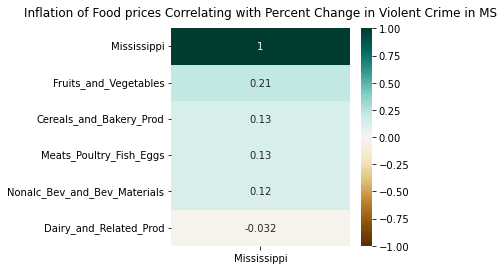

In [37]:
plt.figure(figsize=(4,4))

miss_violent_heatmap = sns.heatmap(miss_violent_and_food.corr()[['Mississippi']].sort_values(by='Mississippi',
                                                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

miss_violent_heatmap.set_title('Inflation of Food prices Correlating with Percent Change in Violent Crime in MS',
                              fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Inflation of Food prices Correlating with Percent Change in Violent Crime in AL')

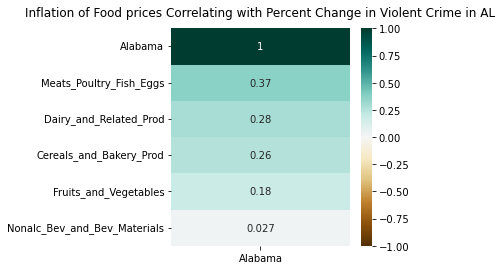

In [38]:
plt.figure(figsize=(4,4))

alabam_violent_heatmap = sns.heatmap(alabam_violent_and_food.corr()[['Alabama']].sort_values(by='Alabama',
                                                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

alabam_violent_heatmap.set_title('Inflation of Food prices Correlating with Percent Change in Violent Crime in AL',
                              fontdict={'fontsize':12}, pad=12)

### Violent Crime in Not-so-Hungry States:

In [39]:
ndakota_violent_and_food = pd.concat([ann_food_pct_change, ndakota_violent], axis=1)
virg_violent_and_food = pd.concat([ann_food_pct_change, virg_violent], axis=1)

ndakota_violent_and_food = ndakota_violent_and_food.apply(pd.to_numeric)
virg_violent_and_food = virg_violent_and_food.apply(pd.to_numeric)

Text(0.5, 1.0, 'Inflation of Food prices Correlating with Percent Change in Violent Crime in ND')

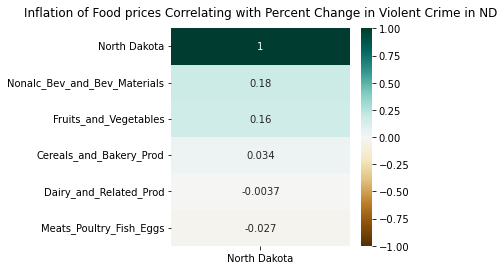

In [40]:
plt.figure(figsize=(4,4))

ndakota_violent_heatmap = sns.heatmap(ndakota_violent_and_food.corr()[['North Dakota']].sort_values(by='North Dakota',
                                                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

ndakota_violent_heatmap.set_title('Inflation of Food prices Correlating with Percent Change in Violent Crime in ND',
                              fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Inflation of Food prices Correlating with Percent Change in Violent Crime in VA')

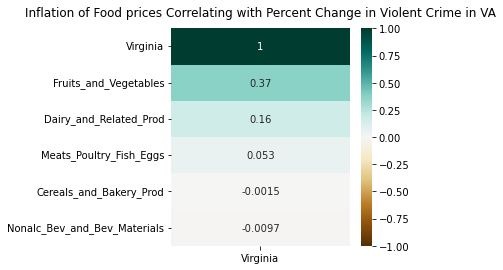

In [41]:
plt.figure(figsize=(4,4))

virg_violent_heatmap = sns.heatmap(virg_violent_and_food.corr()[['Virginia']].sort_values(by='Virginia',
                                                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

virg_violent_heatmap.set_title('Inflation of Food prices Correlating with Percent Change in Violent Crime in VA',
                              fontdict={'fontsize':12}, pad=12)

Count of How many times each Food basket ranked in correlation to Violent crime

In [42]:
food_rank_violent_crime = pd.DataFrame({'Meats_Poultry_Fish_Eggs':[1,0,2,0,1],
                                      'Dairy_and_Related_Prod':[0,2,0,1,1],
                                      'Fruits_and_Vegetables':[2,1,0,1,0],
                                      'Cereals_and_Bakery_Prod':[0,1,2,1,0],
                                      'Nonalc_Bev_and_Bev_Materials':[1,0,0,1,2]}
                                    )

food_rank_violent_crime.index = np.arange(1, len(food_rank_violent_crime)+1)
food_rank_violent_crime.index.name = 'Rank'

food_rank_violent_crime

,Meats_Poultry_Fish_Eggs,Dairy_and_Related_Prod,Fruits_and_Vegetables,Cereals_and_Bakery_Prod,Nonalc_Bev_and_Bev_Materials
Rank,,,,,
1,1,0,2,0,1
2,0,2,1,1,0
3,2,0,0,2,0
4,0,1,1,1,1
5,1,1,0,0,2


#### Analysis
There is no clear and apparent pattern in the correlation statistics between the food price inflation of the different food baskets and percent change in violent crime across these four states. This can be attributed to a multitude of factors such as insufficient data volume and unaccounted-for variables. However, if we take a look at the dataframe above, which shows the number of times each food basket ranked at each place, Fruits and Vegetables seem to rank highest in terms of its correlation to violent crime. Keep this in mind moving forward. I also want to point out the relatively low correlation values for every food basket when looking at violent crime in North Dakota. North Dakota has some of the lowest violent crime rates and is also one of the least populated states in America. Perhaps further research can be conducted on how population size affects the dynamics between crime and food insecurity.

### Property Crime in Hungry States

In [43]:
miss_prop_and_food = pd.concat([ann_food_pct_change, miss_prop], axis=1)
alabam_prop_and_food = pd.concat([ann_food_pct_change, alabam_prop], axis=1)

miss_prop_and_food = miss_prop_and_food.apply(pd.to_numeric)
alabam_prop_and_food = alabam_prop_and_food.apply(pd.to_numeric)

Text(0.5, 1.0, 'Inflation of Food prices Correlating with Percent Change in Property Crime in MS')

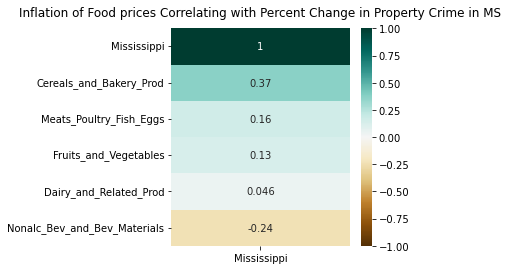

In [44]:
plt.figure(figsize=(4,4))

miss_prop_heatmap = sns.heatmap(miss_prop_and_food.corr()[['Mississippi']].sort_values(by='Mississippi',
                                                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

miss_prop_heatmap.set_title('Inflation of Food prices Correlating with Percent Change in Property Crime in MS',
                              fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Inflation of Food prices Correlating with Percent Change in Property Crime in AL')

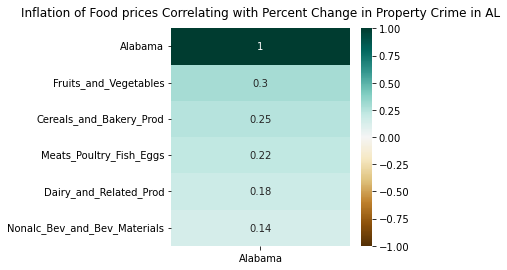

In [45]:
plt.figure(figsize=(4,4))

alabam_prop_heatmap = sns.heatmap(alabam_prop_and_food.corr()[['Alabama']].sort_values(by='Alabama',
                                                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

alabam_prop_heatmap.set_title('Inflation of Food prices Correlating with Percent Change in Property Crime in AL',
                              fontdict={'fontsize':12}, pad=12)

### Property Crime in Not-so-Hungry States:

In [46]:
ndakota_prop_and_food = pd.concat([ann_food_pct_change, ndakota_prop], axis=1)
virg_prop_and_food = pd.concat([ann_food_pct_change, virg_prop], axis=1)

ndakota_prop_and_food = ndakota_prop_and_food.apply(pd.to_numeric)
virg_prop_and_food = virg_prop_and_food.apply(pd.to_numeric)

Text(0.5, 1.0, 'Inflation of Food prices Correlating with Percent Change in Property Crime in ND')

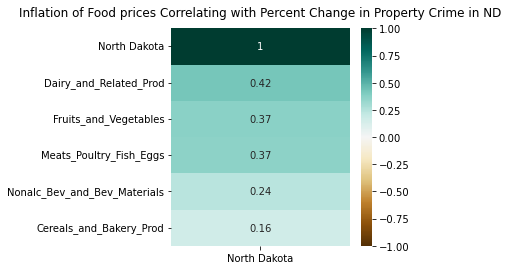

In [47]:
plt.figure(figsize=(4,4))

ndakota_prop_heatmap = sns.heatmap(ndakota_prop_and_food.corr()[['North Dakota']].sort_values(by='North Dakota',
                                                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

ndakota_prop_heatmap.set_title('Inflation of Food prices Correlating with Percent Change in Property Crime in ND',
                              fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Inflation of Food prices Correlating with Percent Change in Property Crime in VA')

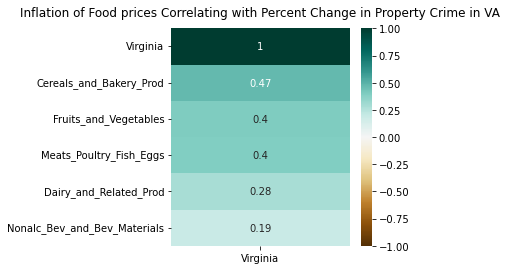

In [48]:
plt.figure(figsize=(4,4))

virg_prop_heatmap = sns.heatmap(virg_prop_and_food.corr()[['Virginia']].sort_values(by='Virginia',
                                                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

virg_prop_heatmap.set_title('Inflation of Food prices Correlating with Percent Change in Property Crime in VA',
                              fontdict={'fontsize':12}, pad=12)

Count of How many times each Food basket ranked in correlation to Property crime

In [49]:
food_rank_prop_crime = pd.DataFrame({'Meats_Poultry_Fish_Eggs':[0,1,3,0,0],
                                      'Dairy_and_Related_Prod':[1,0,0,3,0],
                                      'Fruits_and_Vegetables':[1,2,1,0,0],
                                      'Cereals_and_Bakery_Prod':[2,1,0,0,1],
                                      'Nonalc_Bev_and_Bev_Materials':[0,0,0,1,3]}
                                    )

food_rank_prop_crime.index = np.arange(1, len(food_rank_prop_crime)+1)
food_rank_prop_crime.index.name = 'Rank'

food_rank_prop_crime

,Meats_Poultry_Fish_Eggs,Dairy_and_Related_Prod,Fruits_and_Vegetables,Cereals_and_Bakery_Prod,Nonalc_Bev_and_Bev_Materials
Rank,,,,,
1,0,1,1,2,0
2,1,0,2,1,0
3,3,0,1,0,0
4,0,3,0,0,1
5,0,0,0,1,3


#### Analysis
Note that the correlation values are higher across all food baskets for each state when looking at percent movements in property crime compared to violent crime, indicating a stronger correlation between food price inflation and property crime compared to violent crime. This affirms my original hypothesis. 

Similar to the last section, we can see that Beverage related products rank near the bottom in terms of correlation while Fruits and Vegetables still rank near the top. Contrary to my hypothesis that Meat and protein related products would rank the highest, this food basket seems to consistently fall in the middle of the pack.

Count of How many times each Food basket ranked in correlation to Both Types of crime

In [50]:
food_rank_all_crime = pd.DataFrame({'Meats_Poultry_Fish_Eggs':[1,1,5,0,1],
                                      'Dairy_and_Related_Prod':[1,2,0,4,1],
                                      'Fruits_and_Vegetables':[3,3,1,1,0],
                                      'Cereals_and_Bakery_Prod':[2,2,2,1,1],
                                      'Nonalc_Bev_and_Bev_Materials':[1,0,0,2,5]}
                                    )

food_rank_all_crime.index = np.arange(1, len(food_rank_all_crime)+1)
food_rank_all_crime.index.name = 'Rank'

food_rank_all_crime

,Meats_Poultry_Fish_Eggs,Dairy_and_Related_Prod,Fruits_and_Vegetables,Cereals_and_Bakery_Prod,Nonalc_Bev_and_Bev_Materials
Rank,,,,,
1,1,1,3,2,1
2,1,2,3,2,0
3,5,0,1,2,0
4,0,4,1,1,2
5,1,1,0,1,5


#### Analysis
The above dataframe sums up the two previous dataframes to give a broader look at how these different food baskets performed. As mentioned earlier, I was a bit surprised to see Fruits and Vegetables ranking so high, but, if we think about it, households and individuals facing financial hardships are subjected to purchasing and consuming cheaper foods. If you don't live under a rock and have been grocery shopping before, you'd probably know that canned foods are the best bang-for-your-buck items in terms of shelf-life and price. Unsurprisingly, the canned food items that are most commonly purchased are canned fruits and canned vegetables such as canned corn, beans, and tomatoes. This can give us possible insight into how policymakers at the local, state, and federal level can help the most vulnerable when food price inflation exceeds "acceptable" levels of inflation. There is no such thing as a meaningful action without direction, so if policymakers want to work towards safer communities, especially in times of economic rough patches, maybe they can provide initiatives that will control the prices of fruits and vegetable products. I am in no way claiming that making fruits and vegetable products cheaper will decrease crime, but further research should definitely be conducted to examine potential relationships between these food baskets and movements in criminal activity.

---

## Random Forest Classification
How well can we predict if crime will increase or decrease year-to-year based on food price inflation?

#### Brief overview of Random Forest Classification
The Random Forest Classification model is a machine learning algorithm that is used for classification tasks. It is an ensemble method, which means that it combines the predictions of multiple individual decision trees to make a final prediction. At its core, a Random Forest Classification model trains a large number of decision trees on random subsets of the data, and then has each tree make a prediction. The final prediction is made by combining the predictions of all the individual trees, using a majority vote or some other aggregation method.

This approach has several advantages. First, it helps to reduce overfitting, since each tree is trained on a different subset of the data and is therefore less likely to overfit to a specific pattern in the data. Second, it increases the overall performance and accuracy of the model because the combined predictions of multiple trees are typically more accurate than the predictions of any individual tree. Random Forest Classification can be used to solve a wide range of classification tasks, such as predicting movements in customer turnout, image classification, or fraud detection. It is a versatile and powerful algorithm that is widely used in many different industries.

In [52]:
def crime_up_down(rate):
    '''
    This function is meant to take each column of our dataframe and return 'increase'
    if the value is positive, and 'decrease' if the value is negative
    '''
    if rate < 0:
        out = 'Decrease'
    else:
        out = 'Increase'
        
    return out

In [53]:
# Creating a dataframe indicating whether prices inflated or deflated from the previous year for each food basket

violent_crime_up_down = changes_in_violent_crime.applymap(crime_up_down)
prop_crime_up_down = changes_in_prop_crime.applymap(crime_up_down)

In [54]:
# violent_crime_up_down.head(3)

In [55]:
# Selecting data for each respective state

miss_violent_up_down = violent_crime_up_down.loc[:, ['Mississippi']]
alabam_violent_up_down = violent_crime_up_down.loc[:, ['Alabama']]
ndakota_violent_up_down = violent_crime_up_down.loc[:, ['North Dakota']]
virg_violent_up_down = violent_crime_up_down.loc[:, ['Virginia']]

miss_prop_up_down = prop_crime_up_down.loc[:, ['Mississippi']]
alabam_prop_up_down = prop_crime_up_down.loc[:, ['Alabama']]
ndakota_prop_up_down = prop_crime_up_down.loc[:, ['North Dakota']]
virg_prop_up_down = prop_crime_up_down.loc[:, ['Virginia']]

### Violent Crime

In [56]:
# Creating our dataframes with indicators for violent crime and food price inflation for each state

miss_violent_rf = pd.concat([ann_food_pct_change, miss_violent_up_down], axis=1)
alabam_violent_rf = pd.concat([ann_food_pct_change, alabam_violent_up_down], axis=1)
ndakota_violent_rf = pd.concat([ann_food_pct_change, ndakota_violent_up_down], axis=1)
virg_violent_rf = pd.concat([ann_food_pct_change, virg_violent_up_down], axis=1)

print('Predicting violent crime movement in hungry states:')
print()

# Mississippi
X1 = miss_violent_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y1 = miss_violent_rf['Mississippi']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
clf1 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf1.fit(X1_train, y1_train)
y1_pred = clf1.predict(X1_test)
print(f'Accuracy for predicting violent crime movement in Mississippi: {accuracy_score(y1_test, y1_pred)}')

# Alabama
X2 = alabam_violent_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y2 = alabam_violent_rf['Alabama']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)
print(f'Accuracy for predicting violent crime movement in Alabama: {accuracy_score(y2_test, y2_pred)}')

print()
print('Predicting violent crime movement in not-so-hungry states:')
print()

# North Dakota
X3 = ndakota_violent_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y3 = ndakota_violent_rf['North Dakota']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
clf3 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf3.fit(X3_train, y3_train)
y3_pred = clf3.predict(X3_test)
print(f'Accuracy for predicting violent crime movement in North Dakota: {accuracy_score(y3_test, y3_pred)}')

# Virginia
X4 = virg_violent_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y4 = virg_violent_rf['Virginia']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
clf4 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf4.fit(X4_train, y4_train)
y4_pred = clf4.predict(X4_test)
print(f'Accuracy for predicting violent crime movement in Virginia: {accuracy_score(y4_test, y4_pred)}')

Predicting violent crime movement in hungry states:

Accuracy for predicting violent crime movement in Mississippi: 0.42857142857142855
Accuracy for predicting violent crime movement in Alabama: 0.42857142857142855

Predicting violent crime movement in not-so-hungry states:

Accuracy for predicting violent crime movement in North Dakota: 0.5714285714285714
Accuracy for predicting violent crime movement in Virginia: 0.14285714285714285


### Property Crime

In [57]:
# Creating our dataframes with indicators for property crime and food price inflation for each state

miss_prop_rf = pd.concat([ann_food_pct_change, miss_prop_up_down], axis=1)
alabam_prop_rf = pd.concat([ann_food_pct_change, alabam_prop_up_down], axis=1)
ndakota_prop_rf = pd.concat([ann_food_pct_change, ndakota_prop_up_down], axis=1)
virg_prop_rf = pd.concat([ann_food_pct_change, virg_prop_up_down], axis=1)

print('Predicting property crime movement in hungry states:')
print()

# Mississippi
X5 = miss_prop_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y5 = miss_prop_rf['Mississippi']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
clf5 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf5.fit(X5_train, y5_train)
y5_pred = clf5.predict(X5_test)
print(f'Accuracy for predicting property crime movement in Mississippi: {accuracy_score(y5_test, y5_pred)}')

# Alabama
X6 = alabam_prop_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y6 = alabam_prop_rf['Alabama']
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)
clf6 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf6.fit(X6_train, y6_train)
y6_pred = clf6.predict(X6_test)
print(f'Accuracy for predicting property crime movement in Alabama: {accuracy_score(y6_test, y6_pred)}')

print()
print('Predicting property crime movement in not-so-hungry states:')
print()

# North Dakota
X7 = ndakota_prop_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y7 = ndakota_prop_rf['North Dakota']
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)
clf7 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf7.fit(X7_train, y7_train)
y7_pred = clf7.predict(X7_test)
print(f'Accuracy for predicting property crime movement in North Dakota: {accuracy_score(y7_test, y7_pred)}')

# Virginia
X8 = virg_prop_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y8 = virg_prop_rf['Virginia']
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.2, random_state=42)
clf8 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf8.fit(X8_train, y8_train)
y8_pred = clf8.predict(X8_test)
print(f'Accuracy for predicting property crime movement in Virginia: {accuracy_score(y8_test, y8_pred)}')

Predicting property crime movement in hungry states:

Accuracy for predicting property crime movement in Mississippi: 0.7142857142857143
Accuracy for predicting property crime movement in Alabama: 0.2857142857142857

Predicting property crime movement in not-so-hungry states:

Accuracy for predicting property crime movement in North Dakota: 0.5714285714285714
Accuracy for predicting property crime movement in Virginia: 1.0


### Crime in the United States as a whole

In [58]:
USA_violent_up_down = violent_crime_up_down.loc[:, ['United States']]
USA_prop_up_down = prop_crime_up_down.loc[:, ['United States']]

USA_violent_rf = pd.concat([ann_food_pct_change, USA_violent_up_down], axis=1)
USA_prop_rf = pd.concat([ann_food_pct_change, USA_prop_up_down], axis=1)

# Violent crime

print('Predicting violent crime movement in the US:')

X9 = USA_violent_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y9 = USA_violent_rf['United States']
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.2, random_state=42)
clf9 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf9.fit(X9_train, y9_train)
y9_pred = clf9.predict(X9_test)
print(f'Accuracy for predicting violent crime movement in the US: {accuracy_score(y9_test, y9_pred)}')

# Property crime

print()
print('Predicting property crime movement in the US:')

X10 = USA_prop_rf[['Meats_Poultry_Fish_Eggs', 'Dairy_and_Related_Prod', 'Fruits_and_Vegetables',
                     'Cereals_and_Bakery_Prod', 'Nonalc_Bev_and_Bev_Materials']]
y10 = USA_prop_rf['United States']
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.2, random_state=42)
clf10 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             bootstrap=False,
                             oob_score=False,
                             warm_start=True,
                             random_state=42)
clf10.fit(X10_train, y10_train)
y10_pred = clf10.predict(X10_test)
print(f'Accuracy for predicting property crime movement in the US: {accuracy_score(y10_test, y10_pred)}')

Predicting violent crime movement in the US:
Accuracy for predicting violent crime movement in the US: 0.7142857142857143

Predicting property crime movement in the US:
Accuracy for predicting property crime movement in the US: 1.0


#### Analysis
There doesn't seem to be any significant statistical patterns in the accuracy scores of our test runs. The volume of data is a bit small relative to what a Random Forest model can handle. However, we can see that with the exception of predicting the movement of crime in Alabama, accuracy scores are higher or remain constant when predicting movement in property crime compared to violent. This builds off my previous analysis and hypothesis that food price inflation affects property crime more so than violent crime. We also see an accuracy score of 100\% when predicting the movement of property crime in Virginia and in the United States as a whole. I do not think this is statistically significant however, due to the small sample size of testing data fed into the models. 

Additionally, there is no clear evidence that shows that the movement of crime is significantly different between food insecure and food secure states. Although the levels of crime may be different, the movement of crime in relation to food price inflation seem to be constant.

---

## Conclusion
If a healthier, safer and more inclusive society is in everyone's best interest (like it should be), then conducting more research surrounding the specifics of how food prices and access to quality food affects individuals, households, and communities is an essential part of finding optimal solutions. In this research project, I attempted to find meaningful connections between food price inflation of different food baskets and its impact on violent and property crime in food insecure and food secure states. To reiterate, there are many limitations with this analysis due to the volume of data, or lack thereof, and the neglection of other related variables. However, we were still able to see a pattern in terms of which food basket seems to correlate the most with the percent changes in criminal activity, along with which type of crime seems to correlate more with food price inflation. I hope this can be a part of something much greater and can help others seeking to tackle food insecurity and community safety issues. 

---

## References
#### Data:
- https://ourworldindata.org/food-prices
- https://www.socialpolicylab.org/post/grow-your-blog-community
- https://fred.stlouisfed.org/series/CUSR0000SAF112
- https://fred.stlouisfed.org/series/CUSR0000SEFJ
- https://fred.stlouisfed.org/series/CUSR0000SAF113
- https://fred.stlouisfed.org/series/CUSR0000SAF111
- https://fred.stlouisfed.org/series/CUSR0000SAF114
- All crime data was taken from the following link. You are able to tune the parameters to find what you want:
https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/home

**Note:** The link provided below is the link to the Github repository I created to pubicly host all the CSV files I used from the links provided directly above. Please visit that repository if you want access to the full data files I used throughout my project.
- https://github.com/rickyzoo/Food_price_inflation_and_crime

#### Referenced research:
- https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/measurement/
- https://ir.library.illinoisstate.edu/cgi/viewcontent.cgi?article=1019&context=scced

#### Code assistance:
- Seaborn example code: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
- Random Forest Classifier example: https://www.datacamp.com/tutorial/random-forests-classifier-python